In [0]:
import tensorflow as tf
from tensorflow import keras

In [2]:
import numpy as np
import matplotlib.pyplot as plt

from keras.utils import np_utils
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense, Activation

Using TensorFlow backend.


In [3]:
fashion_mnist = keras.datasets.fashion_mnist

(tr_image, tr_label), (te_image, te_label) = fashion_mnist.load_data()

4423680/4422102 [==============================] - 0s 0us/step


In [4]:
tr_image.shape

(60000, 28, 28)

In [6]:
tr_label.shape

(60000,)

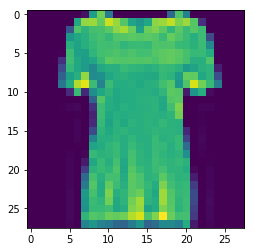

In [8]:
plt.figure()
plt.imshow(tr_image[10])
plt.show()

In [0]:
label_name = ['Top', 'Pants', 'Pullover','Dress','Coat','Sandle','Shirt','Sneaker', 'Bag','Shoes']

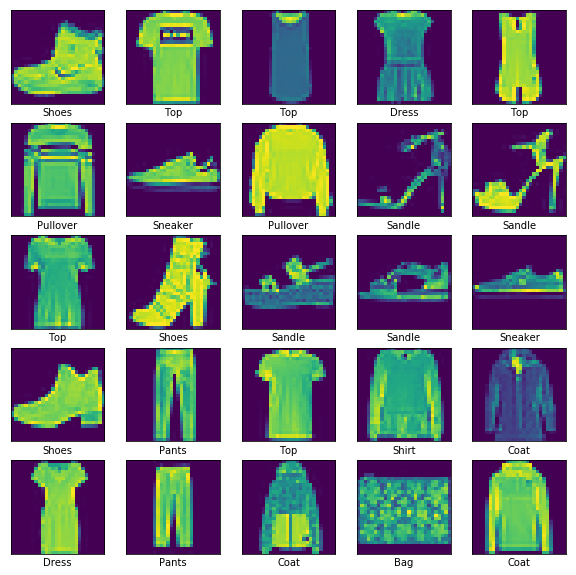

In [10]:
plt.figure(figsize=(10,10))
for i in range(25):
  plt.subplot(5,5,i+1)
  plt.xticks([])
  plt.yticks([])
  plt.grid(False)
  plt.imshow(tr_image[i])
  plt.xlabel(label_name[tr_label[i]])
plt.show()

In [0]:
tr_image = tr_image.reshape(60000, 784).astype('float32')/255.0
te_image = te_image.reshape(10000, 784).astype('float32')/255.0

In [0]:
tr_label = np_utils.to_categorical(tr_label)
te_label = np_utils.to_categorical(te_label)

In [13]:
tr_label

array([[0., 0., 0., ..., 0., 0., 1.],
       [1., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]], dtype=float32)

In [0]:
val_image = tr_image[50000:]
val_label = tr_label[50000:]
tr_image = tr_image[:50000]
tr_label = tr_label[:50000]

In [15]:
28*28

784

In [16]:
val_image.shape

(10000, 784)

In [0]:
tr_rand = np.random.choice(50000, 700)
val_rand = np.random.choice(10000, 300)

tr_image = tr_image[tr_rand]
tr_label = tr_label[tr_rand]
val_image = val_image[val_rand]
val_label = val_label[val_rand]

# 모델 구성하기

In [0]:
model = Sequential()
model.add(Dense(units=64, input_dim=28*28, activation='relu'))
model.add(Dense(64, activation='relu'))
model.add(Dense(units=10, activation='softmax'))

# 모델 학습과정 설정

In [0]:
model.compile(loss='categorical_crossentropy', optimizer='sgd', metrics=['accuracy'])

# 모델 학습시키기

In [26]:
hist= model.fit(tr_image, tr_label, epochs=100, batch_size=32, validation_data=(val_image, val_label)) 

Train on 700 samples, validate on 300 samples
Epoch 1/100
700/700 [==============================] - 0s 274us/step - loss: 2.2379 - acc: 0.2071 - val_loss: 2.0940 - val_acc: 0.2700
Epoch 2/100
700/700 [==============================] - 0s 56us/step - loss: 2.0370 - acc: 0.3443 - val_loss: 1.9354 - val_acc: 0.3533
Epoch 3/100
700/700 [==============================] - 0s 60us/step - loss: 1.8826 - acc: 0.4229 - val_loss: 1.7774 - val_acc: 0.4167
Epoch 4/100
700/700 [==============================] - 0s 57us/step - loss: 1.7281 - acc: 0.4800 - val_loss: 1.6216 - val_acc: 0.5400
Epoch 5/100
700/700 [==============================] - 0s 65us/step - loss: 1.5814 - acc: 0.5471 - val_loss: 1.4746 - val_acc: 0.6000
Epoch 6/100
700/700 [==============================] - 0s 60us/step - loss: 1.4485 - acc: 0.6029 - val_loss: 1.3566 - val_acc: 0.6067
Epoch 7/100
700/700 [==============================] - 0s 59us/step - loss: 1.3363 - acc: 0.6086 - val_loss: 1.2614 - val_acc: 0.6333
Epoch 8/100
700

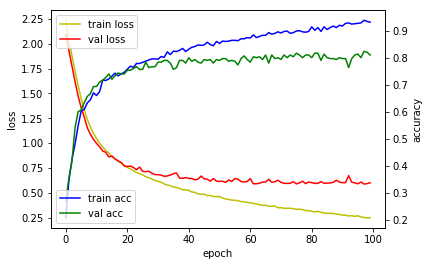

In [27]:
fig, loss_ax = plt.subplots()

acc_ax = loss_ax.twinx()

loss_ax.plot(hist.history['loss'], 'y', label='train loss')
loss_ax.plot(hist.history['val_loss'], 'r', label='val loss')

acc_ax.plot(hist.history['acc'], 'b', label='train acc')
acc_ax.plot(hist.history['val_acc'], 'g', label='val acc')

loss_ax.set_xlabel('epoch')
loss_ax.set_ylabel('loss')
acc_ax.set_ylabel('accuracy')

loss_ax.legend(loc='upper left')
acc_ax.legend(loc='lower left')


plt.show()

In [30]:
import os
os.getcwd()

'/content'

In [31]:
print('## training loss and acc ##')
print(hist.history['loss'])
print(hist.history['acc'])

## training loss and acc ##
[2.2378665351867677, 2.037015756198338, 1.8825666993004935, 1.7281446252550399, 1.5814336838041032, 1.4485114445005145, 1.3363093553270613, 1.2391094868523733, 1.1611517095565795, 1.0970052293368748, 1.0465643841879708, 0.9997051794188363, 0.9607087888036455, 0.9267017630168369, 0.8997243319238936, 0.863648646899632, 0.8397694761412484, 0.8213787916728429, 0.796907947404044, 0.7720381675447736, 0.755058138029916, 0.7400916273253305, 0.7222513042177473, 0.7038314461708068, 0.6904326350348337, 0.6803488673482623, 0.6616451951435635, 0.6509526704038893, 0.6387647400583539, 0.6228946920803615, 0.6139145854541234, 0.6063133066041129, 0.5888556238583156, 0.5777557969093323, 0.5706865617207119, 0.5567101992879595, 0.5532875081471035, 0.5435868220669883, 0.5292060221944537, 0.5300341532911573, 0.5234866104807172, 0.5070670923164913, 0.5040269548552377, 0.48829412375177655, 0.48422760486602784, 0.486505948134831, 0.470512501512255, 0.47268134798322403, 0.461731239046

# 모델 평가

In [33]:
loss_and_acc = model.evaluate(te_image, te_label, batch_size=32)
print(loss_and_acc)

10000/10000 [==============================] - 0s 21us/step
[0.6267356976032257, 0.7894]


# 모델 사용

In [34]:
xhat = te_image
yhat = model.predict(xhat)
print(yhat)

[[1.8413455e-04 3.9983162e-05 7.1304756e-05 ... 1.7290296e-01
  1.8530138e-02 5.6146252e-01]
 [3.0584797e-06 2.1942755e-05 9.3618637e-01 ... 5.2609451e-08
  9.6288140e-06 8.9133918e-09]
 [2.5137523e-04 9.9962127e-01 1.8963172e-05 ... 1.5574881e-07
  1.0177039e-10 3.5805439e-09]
 ...
 [1.7216967e-01 7.3913779e-06 2.6416748e-03 ... 1.9742623e-05
  7.5317466e-01 1.5292969e-04]
 [2.4621302e-04 9.9248987e-01 4.0802712e-04 ... 2.9388741e-05
  5.4325294e-08 2.9300290e-06]
 [3.4347680e-04 6.4233498e-04 1.3351258e-03 ... 7.1094310e-01
  3.0341346e-02 9.3172584e-03]]


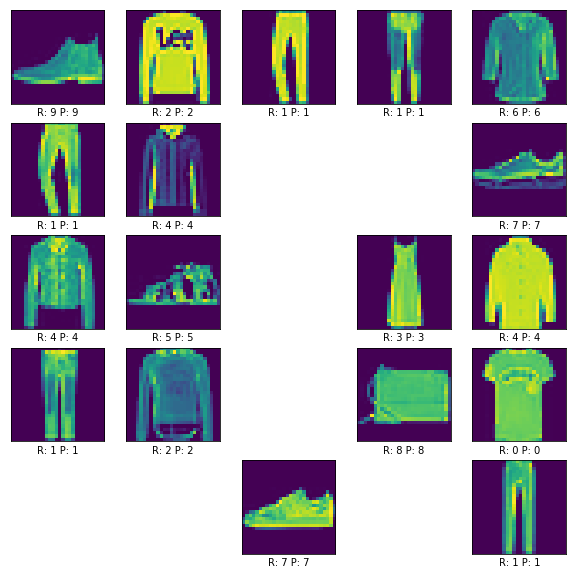

In [35]:
%matplotlib inline
import matplotlib.pyplot as plt



#plt_row = 10
#plt_col = 10


i = 0


plt.figure(figsize=(10,10))
for i in range(25):    
    if np.argmax(te_label[i]) == np.argmax(yhat[i]):
        plt.subplot(5,5,i+1)
        plt.xticks([])
        plt.yticks([])
        plt.grid(False) 
        plt.imshow(te_image[i].reshape(28, 28))
        plt.xlabel('R: ' + str(np.argmax(te_label[i])) + ' P: ' + str(np.argmax(yhat[i])))
        i += 1
      

plt.show()